# 6.2.5 Perceptrón simple

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron

import warnings
warnings.filterwarnings("ignore")

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:

- Cada patrón de entrada tiene la forma $x = [+1, x_1, x_2, … , x_n]$. 
- Las clases $C_1$ y $C_2$ se representan como $\{−1, +1 \}$ respectivamente.
- Los parámetros del perceptrón binario son $w = [w_0, w_1, … , w_n]$ tal que $y = \phi (w^T x)$, donde $\phi(.)$ es un conmutador bipolar.

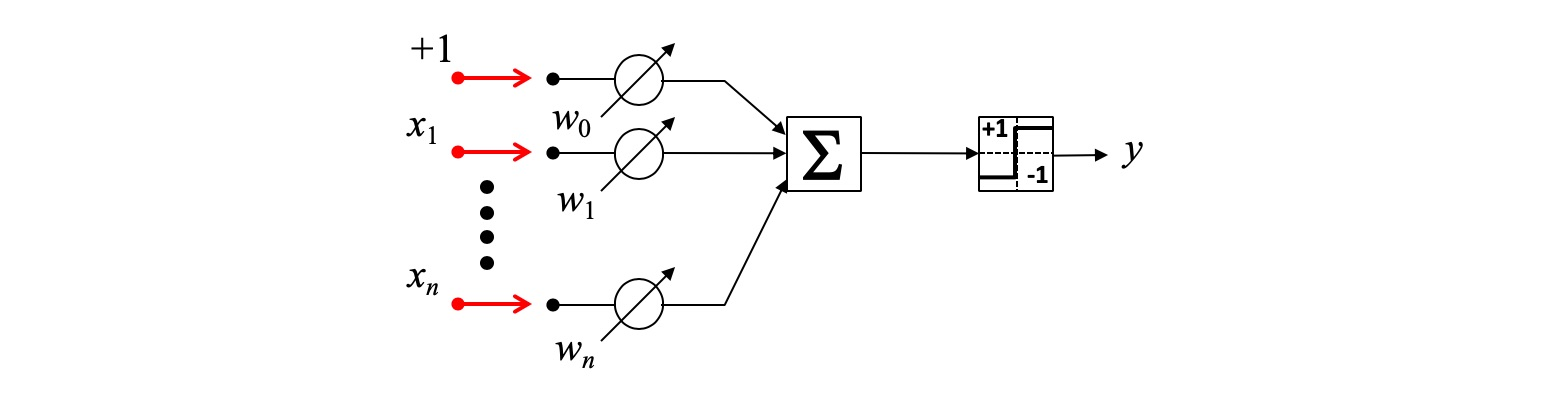

Note que $w^Tx$ es un modelo lineal. <br>
Se desea encontrar el vector $w$ tal que el perceptrón clasifique correctamente todos los patrones de entrenamiento. <br>
La función de pérdida del perceptrón se basa en el cálculo del error $e_k$ definido como:

$$  
e_k = d_k − y_k = d_k − \phi(w^T_k x_k) =
\begin{cases}
    0 & \text{si } d_k = y_k \\
    +2 & \text{si} d_k = +1 y y_k = −1 \\
    -2 & \text{si} d_k = −1 y y_k = +1
\end{cases}
$$

Los parámetros del modelo son estimados numéricamente usando el método del gradiente descendente:

$$ w_k + 1 = w_k + e_k x_k $$

El perceptrón es equivalente a: 

- SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None).

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
perceptron = Perceptron(
    # --------------------------------------------------------------------------
    # Specify the norm of the penalty:
    # * None: no penalty is added.
    # * 'l2': add a L2 penalty term and it is the default choice.
    # * 'l1': add a L1 penalty term.
    # * 'elasticnet': both L1 and L2 penalty terms are added.
    penalty=None,
    # --------------------------------------------------------------------------
    # Constant that multiplies the regularization term if regularization is
    # used.
    alpha=0.0001,
    # --------------------------------------------------------------------------
    # The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1. l1_ratio=0
    # corresponds to L2 penalty, l1_ratio=1 to L1. Only used if
    # penalty='elasticnet'.
    l1_ratio=0.15,
    # --------------------------------------------------------------------------
    # Whether the intercept should be estimated or not. If False, the data is
    # assumed to be already centered.
    fit_intercept=True,
    # --------------------------------------------------------------------------
    # The maximum number of passes over the training data (aka epochs). It only
    # impacts the behavior in the fit method, and not the partial_fit method.
    max_iter=1000,
    # --------------------------------------------------------------------------
    # The stopping criterion. If it is not None, the iterations will stop when
    # (loss > previous_loss - tol).
    tol=1e-3,
    # --------------------------------------------------------------------------
    # Whether or not the training data should be shuffled after each epoch.
    shuffle=True,
    # --------------------------------------------------------------------------
    # Constant by which the updates are multiplied.
    eta0=1,
    # --------------------------------------------------------------------------
    # Used to shuffle the training data, when shuffle is set to True. Pass an
    # int for reproducible output across multiple function calls.
    random_state=0,
    # --------------------------------------------------------------------------
    # Whether to use early stopping to terminate training when validation. score
    # is not improving. If set to True, it will automatically set aside a
    # stratified fraction of training data as validation and terminate training
    # when validation score is not improving by at least tol for
    # n_iter_no_change consecutive epochs.
    early_stopping=False,
    # --------------------------------------------------------------------------
    # The proportion of training data to set aside as validation set for early
    # stopping. Must be between 0 and 1. Only used if early_stopping is True.
    validation_fraction=0.1,
    # --------------------------------------------------------------------------
    # Number of iterations with no improvement to wait before early stopping.
    n_iter_no_change=5,
    # --------------------------------------------------------------------------
    # Weights associated with classes. If not given, all classes are supposed to
    # have weight one. The “balanced” mode uses the values of y to automatically
    # adjust weights inversely proportional to class frequencies in the input
    # data as n_samples / (n_classes * np.bincount(y)).
    class_weight=None,
    # --------------------------------------------------------------------------
    # When set to True, reuse the solution of the previous call to fit as
    # initialization, otherwise, just erase the previous solution.
    warm_start=False,
)

perceptron.fit(X, y)

perceptron.predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [5]:
perceptron.score(X, y)

0.9261862917398945

In [6]:
perceptron.intercept_

array([301.])

In [7]:
perceptron.coef_

array([[ 2.30434100e+03,  2.97808000e+03,  1.32373800e+04,
         4.55750000e+03,  1.99728200e+01, -1.39147700e+01,
        -4.75552493e+01, -1.99746190e+01,  3.85718000e+01,
         1.62372600e+01,  6.11430000e+00,  2.13245700e+02,
        -1.26940700e+02, -6.19829200e+03,  9.33463000e-01,
        -3.70119900e+00, -6.05731830e+00, -8.79828000e-01,
         3.13196800e+00,  1.54238900e-01,  2.42195700e+03,
         3.69363000e+03,  1.31086400e+04, -6.70030000e+03,
         2.39875500e+01, -5.68726600e+01, -1.05821866e+02,
        -2.51252590e+01,  4.93057000e+01,  1.36139600e+01]])

In [8]:
print('ok_')

ok_
